In [1]:
#spam.csv

In [8]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

C:\Users\Amroy\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [9]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Amroy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Amroy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amroy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
df = pd.read_csv("spam.csv",encoding='ISO-8859-1')
df.head()

,category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,not spam,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,not spam,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,not spam,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,not spam,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
df

,category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,not spam,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,not spam,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,not spam,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,not spam,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,not spam,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,not spam,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,not spam,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   category    5572 non-null   object
 1   Message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [15]:
df.isna().sum()

category         0
Message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [16]:
df.isna().sum()/df.shape[0]*100

category       0.000000
Message        0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [17]:
df.shape

(5572, 5)

In [18]:
#delete unwanted columns
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [19]:
df

,category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,not spam,Will Ì_ b going to esplanade fr home?
5569,not spam,"Pity, * was in mood for that. So...any other s..."
5570,not spam,The guy did some bitching but I acted like i'd...


In [20]:
#create a wordcloud for identify the most repeated words
wc = WordCloud(width=500,height=500,background_color="white",min_font_size=10)

In [21]:
wc.generate(''.join(df[df['category']=="spam"]['Message'])) #create a word cloud where category is spam

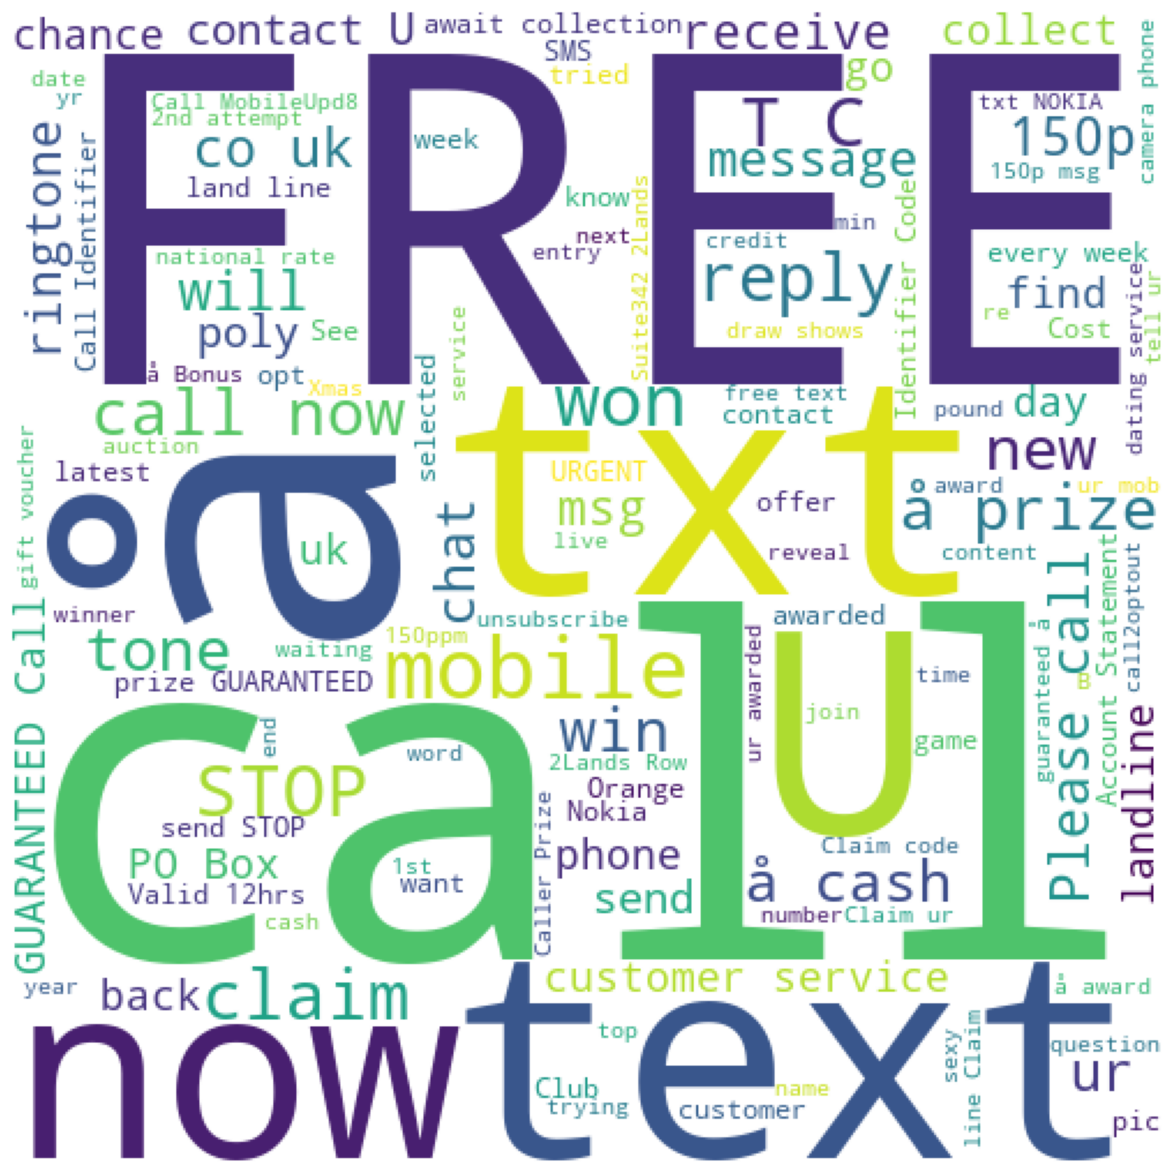

In [22]:
plt.figure(figsize=(20,15))
plt.imshow(wc) # inbuilt function to show images
plt.axis("off")
plt.show()


In [23]:
wc.generate(''.join(df[df['category']=='not spam']['Message']))

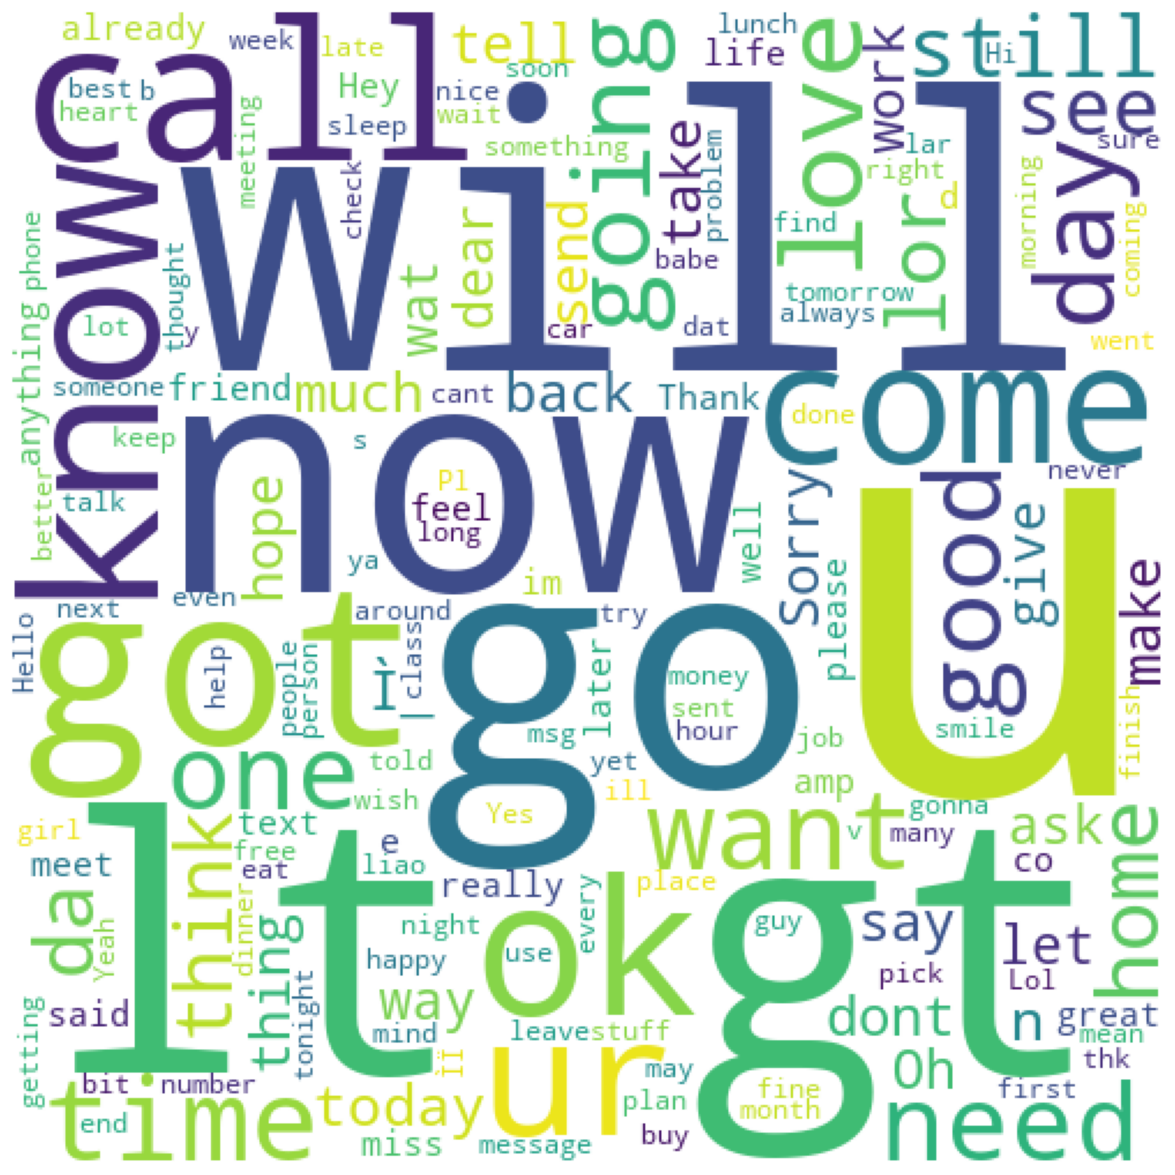

In [24]:
plt.figure(figsize=(20,15))
plt.imshow(wc)
plt.axis('off')
plt.show()

Text Preprocessing

In [25]:
#first remove stopwords
#list of stopwords

In [26]:
stop =stopwords.words('english')

In [27]:
#create a user defined function for text preprocessing
def clean_text(text):
    #convert in lower case then tokemize
    tokens = word_tokenize(text.lower())
    #no separate alphabets from the "Message" (filter only alphabets using isalpha())
    word_tokens =[t for t in tokens if t.isalpha()]
    #print(tokens)
    #print(word_tokens)
    #remove stopwords
    clean_tokens= [t for t in word_tokens if t not in stop]
    #print(clean_tokens)
    #Lemmatize
    lemma = WordNetLemmatizer()
    lemmatized_token = [lemma.lemmatize(t,pos="n") for t in clean_tokens]
    return "".join(lemmatized_token) #we need to join all messages to create features
    # as when we join all documnets we need to store in a corpus

In [28]:
res=clean_text("This is the wolves 2nd time we have tried 2 study studied, studying contact u...")
print(res)

wolftimetriedstudystudiedstudyingcontactu


In [29]:
df['Message'] = df['Message'].apply(clean_text) #apply the clean_text to Message Column

In [30]:
df['Message']

0       gojurongpointcrazyavailablebugisngreatworldlae...
1                                      oklarjokingwifuoni
2       freeentrywklycompwinfacupfinaltktsmaytextfarec...
3                             udunsayearlyhorucalreadysay
4                           nahthinkgousflifearoundthough
                              ...                        
5567    timetriedcontactupoundprizeclaimeasycallperminute
5568                                bgoingesplanadefrhome
5569                                   pitymoodsuggestion
5570    guybitchingactedlikeinterestedbuyingsomethinge...
5571                                         rofltruename
Name: Message, Length: 5572, dtype: object

In [31]:
df.head()

,category,Message
0,not spam,gojurongpointcrazyavailablebugisngreatworldlae...
1,not spam,oklarjokingwifuoni
2,spam,freeentrywklycompwinfacupfinaltktsmaytextfarec...
3,not spam,udunsayearlyhorucalreadysay
4,not spam,nahthinkgousflifearoundthough


In [32]:
#separate the features and target
x=df['Message'] #input
y=df['category'] # target variable

In [33]:
y

0       not spam
1       not spam
2           spam
3       not spam
4       not spam
          ...   
5567        spam
5568    not spam
5569    not spam
5570    not spam
5571    not spam
Name: category, Length: 5572, dtype: object

In [34]:
#from sklearn.preprocessing import LabelEncoder

In [35]:
#lbe = LabelEncoder()

In [36]:
#y=lbe.fit_transform(y)

In [37]:
#y

In [38]:
def encode(a):
    index={"spam":1,"not spam":0}
    return index[a]

In [39]:
y= y.apply(encode)
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: category, Length: 5572, dtype: int64

In [40]:
#train_test_split
from sklearn.model_selection import train_test_split

In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [42]:
len(xtrain),len(ytrain),len(xtest), len(ytest)

(3900, 3900, 1672, 1672)

In [43]:
#vectorization (convert text into vectors)
#first we try Count vectorization

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
cv = CountVectorizer() #not passing stopwords="english", because in function "clean text" we have removed the stopwords

In [46]:
xtrain_cv = cv.fit_transform(xtrain) #on training(70%) input
xtest_cv = cv.transform(xtest) #on test(30%) input (only transform because we do not want same scaling parameters of train and test,once trained then we only transform on test)

In [47]:
xtrain_cv

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3888 stored elements and shape (3900, 3603)>

In [48]:
xtest_cv

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 210 stored elements and shape (1672, 3603)>

In [49]:
#train the model using DecisionTreeClassifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [51]:
xtrain_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:
xtest_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
dt = DecisionTreeClassifier()

In [54]:
dt.fit(xtrain_cv,ytrain) #train the model

DecisionTreeClassifier()

In [55]:
ypred = dt.predict(xtest_cv)

In [56]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1454
           1       1.00      0.32      0.48       218

    accuracy                           0.91      1672
   macro avg       0.95      0.66      0.72      1672
weighted avg       0.92      0.91      0.89      1672



In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
cm = confusion_matrix(ytest,ypred)
cm

array([[1454,    0],
       [ 149,   69]], dtype=int64)

In [59]:
# using Tfidf vectorizer

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
tfidf = TfidfVectorizer()

In [62]:
xtrain_tfidf= tfidf.fit_transform(xtrain)
xtest_tfidf = tfidf.transform(xtest)

In [63]:
dt1 =DecisionTreeClassifier()

In [64]:
dt1.fit(xtrain_tfidf,ytrain)

DecisionTreeClassifier()

In [65]:
ypred1 = dt1.predict(xtest_tfidf)

In [66]:
cm = confusion_matrix(ytest,ypred1)
cm

array([[1454,    0],
       [ 149,   69]], dtype=int64)

In [67]:
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1454
           1       1.00      0.32      0.48       218

    accuracy                           0.91      1672
   macro avg       0.95      0.66      0.72      1672
weighted avg       0.92      0.91      0.89      1672

